In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random

from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("../input/tabular-playground-series-jun-2022/data.csv")
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [3]:
df.shape

(1000000, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 81 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   row_id  1000000 non-null  int64  
 1   F_1_0   981603 non-null   float64
 2   F_1_1   981784 non-null   float64
 3   F_1_2   981992 non-null   float64
 4   F_1_3   981750 non-null   float64
 5   F_1_4   981678 non-null   float64
 6   F_1_5   981911 non-null   float64
 7   F_1_6   981867 non-null   float64
 8   F_1_7   981872 non-null   float64
 9   F_1_8   981838 non-null   float64
 10  F_1_9   981751 non-null   float64
 11  F_1_10  982039 non-null   float64
 12  F_1_11  981830 non-null   float64
 13  F_1_12  981797 non-null   float64
 14  F_1_13  981602 non-null   float64
 15  F_1_14  981961 non-null   float64
 16  F_2_0   1000000 non-null  int64  
 17  F_2_1   1000000 non-null  int64  
 18  F_2_2   1000000 non-null  int64  
 19  F_2_3   1000000 non-null  int64  
 20  F_2_4   1000000 non-null 

# Observations:

* The float columns are missing values, the integers are not.

In [5]:
feature_cols = [i for i in df.columns if "F" in i]
float_cols = [i for i in df.columns if df[i].dtype == float]
int_cols = [i for i in df.columns if df[i].dtype == int and "F" in i]

F_1_cols = [i for i in df.columns if "F_1" in i]
F_2_cols = [i for i in df.columns if "F_2" in i]
F_3_cols = [i for i in df.columns if "F_3" in i]
F_4_cols = [i for i in df.columns if "F_4" in i]

F_123_cols = F_1_cols + F_2_cols + F_3_cols

In [6]:
print("There are: ", len(float_cols), "float features")
print("There are: ", len(int_cols), "integer features")

print("There are: ", len(F_1_cols), "F1 features")
print("There are: ", len(F_2_cols), "F2 features")
print("There are: ", len(F_3_cols), "F3 features")
print("There are: ", len(F_4_cols), "F4 features")

There are:  55 float features
There are:  25 integer features
There are:  15 F1 features
There are:  25 F2 features
There are:  25 F3 features
There are:  15 F4 features


In [7]:
colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen", "lightseagreen",
          "cornflowerblue", "mediumpurple", "palevioletred", "lightskyblue", "sandybrown",
          "yellowgreen", "indianred", "lightsteelblue", "mediumorchid", "deepskyblue"]

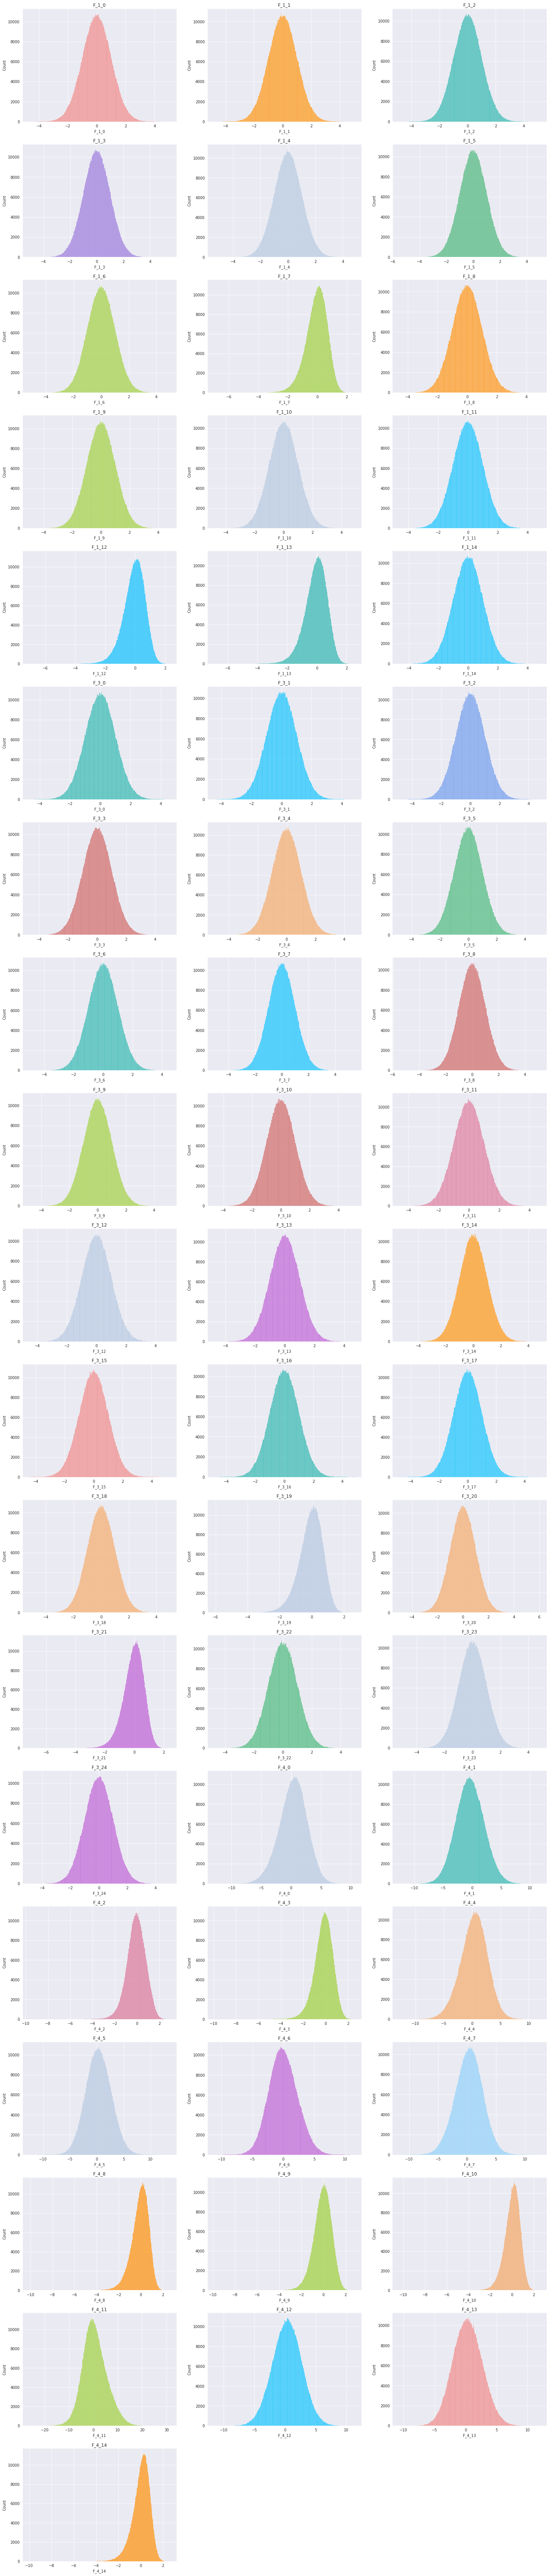

In [8]:
plt.subplots(figsize=(25,125))
for i, column in enumerate(float_cols):
    plt.subplot(19,3,i+1)
    sns.histplot(data=df, x=column, color=random.choice(colors))
    plt.title(column)

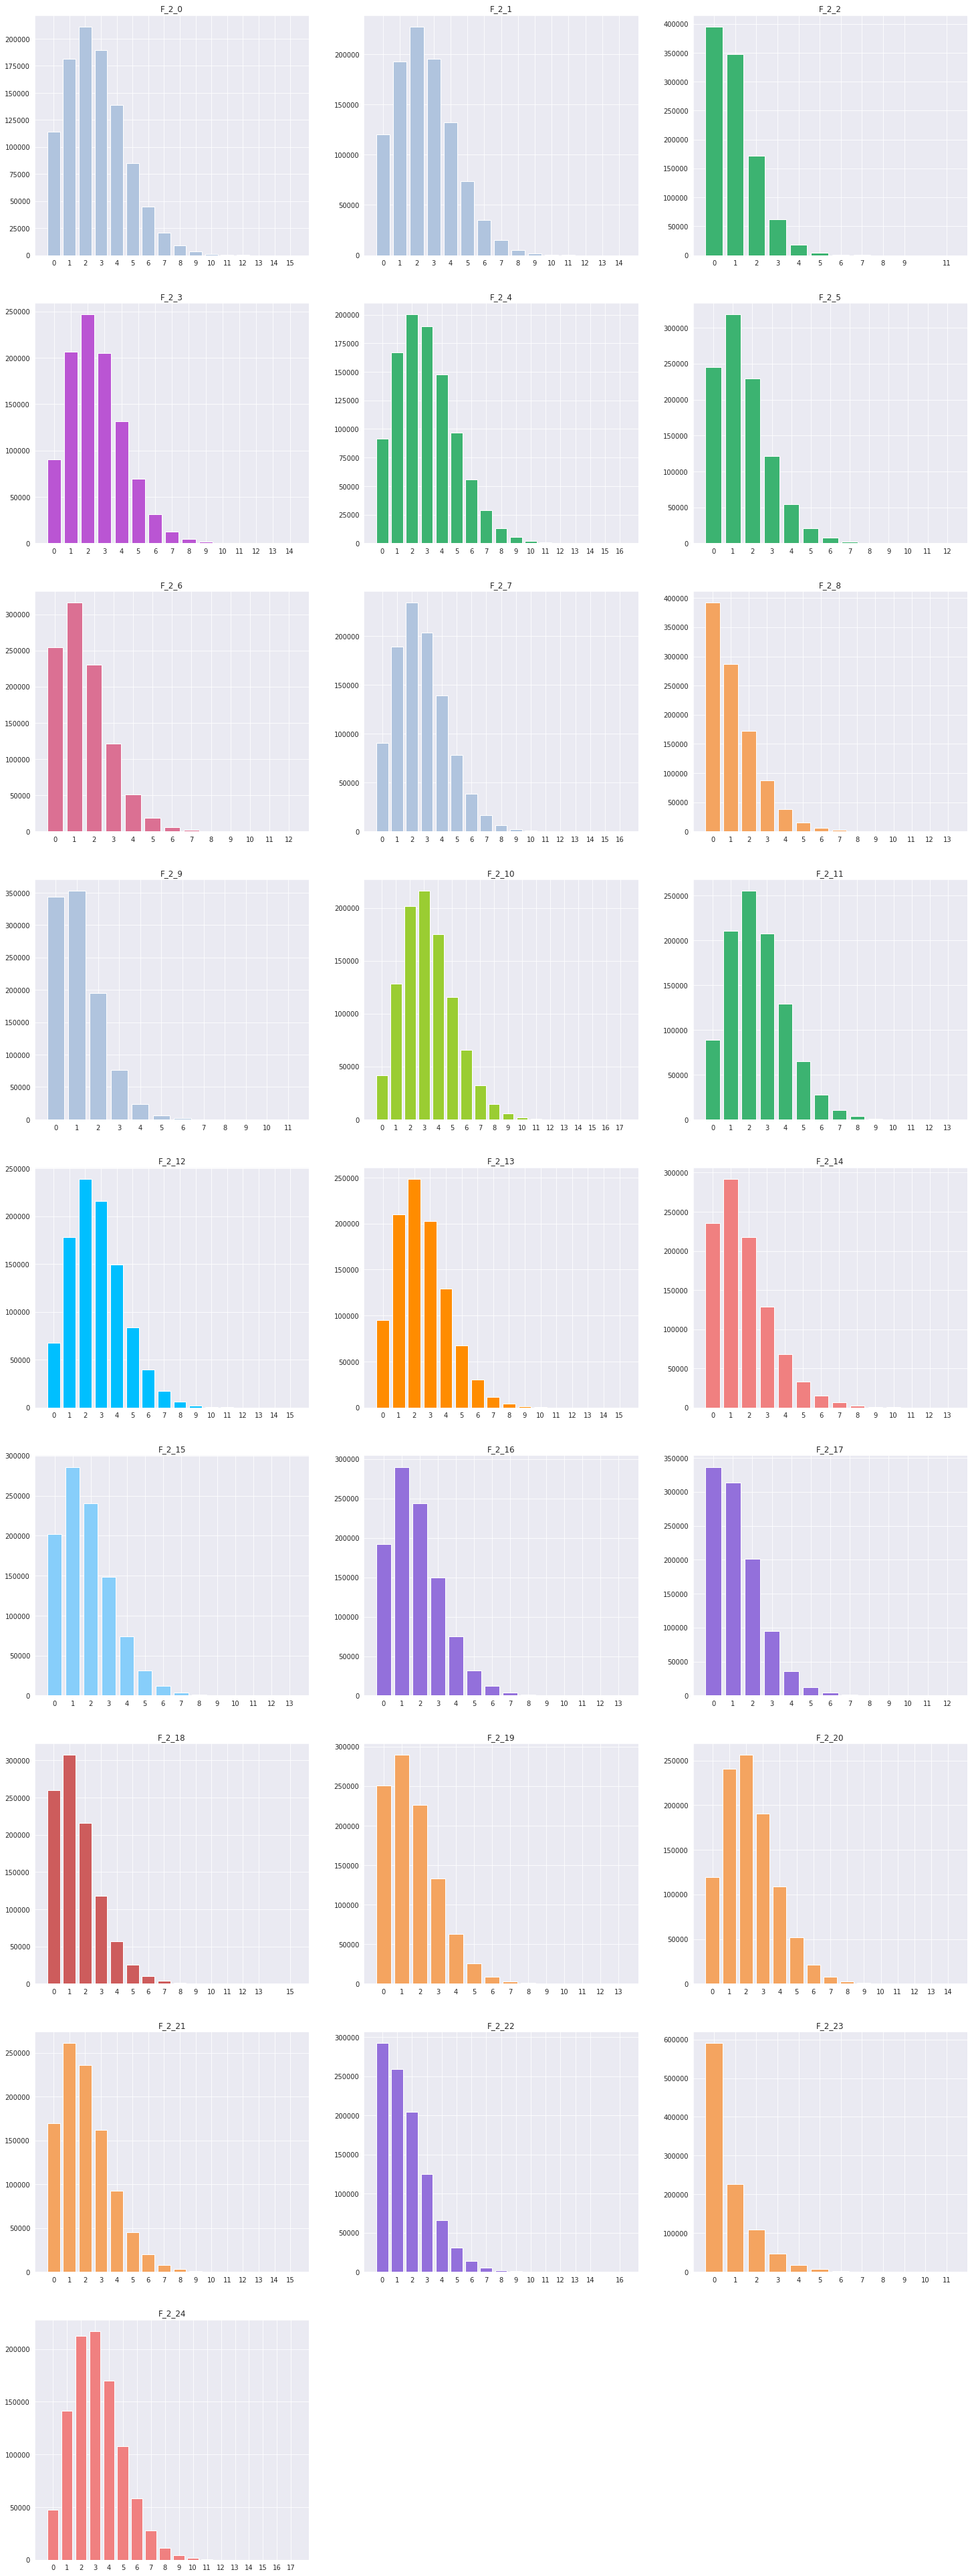

In [9]:
plt.subplots(figsize=(25,70))
for i, column in enumerate(int_cols):
    val_count = df[column].value_counts()
    ax = plt.subplot(9,3,i+1)
    #sns.barplot(x=val_count.index,y=val_count.values)
    ax.bar(val_count.index, val_count.values, color=random.choice(colors))
    ax.set_xticks(val_count.index)
    plt.title(column)


## Correlations between features:

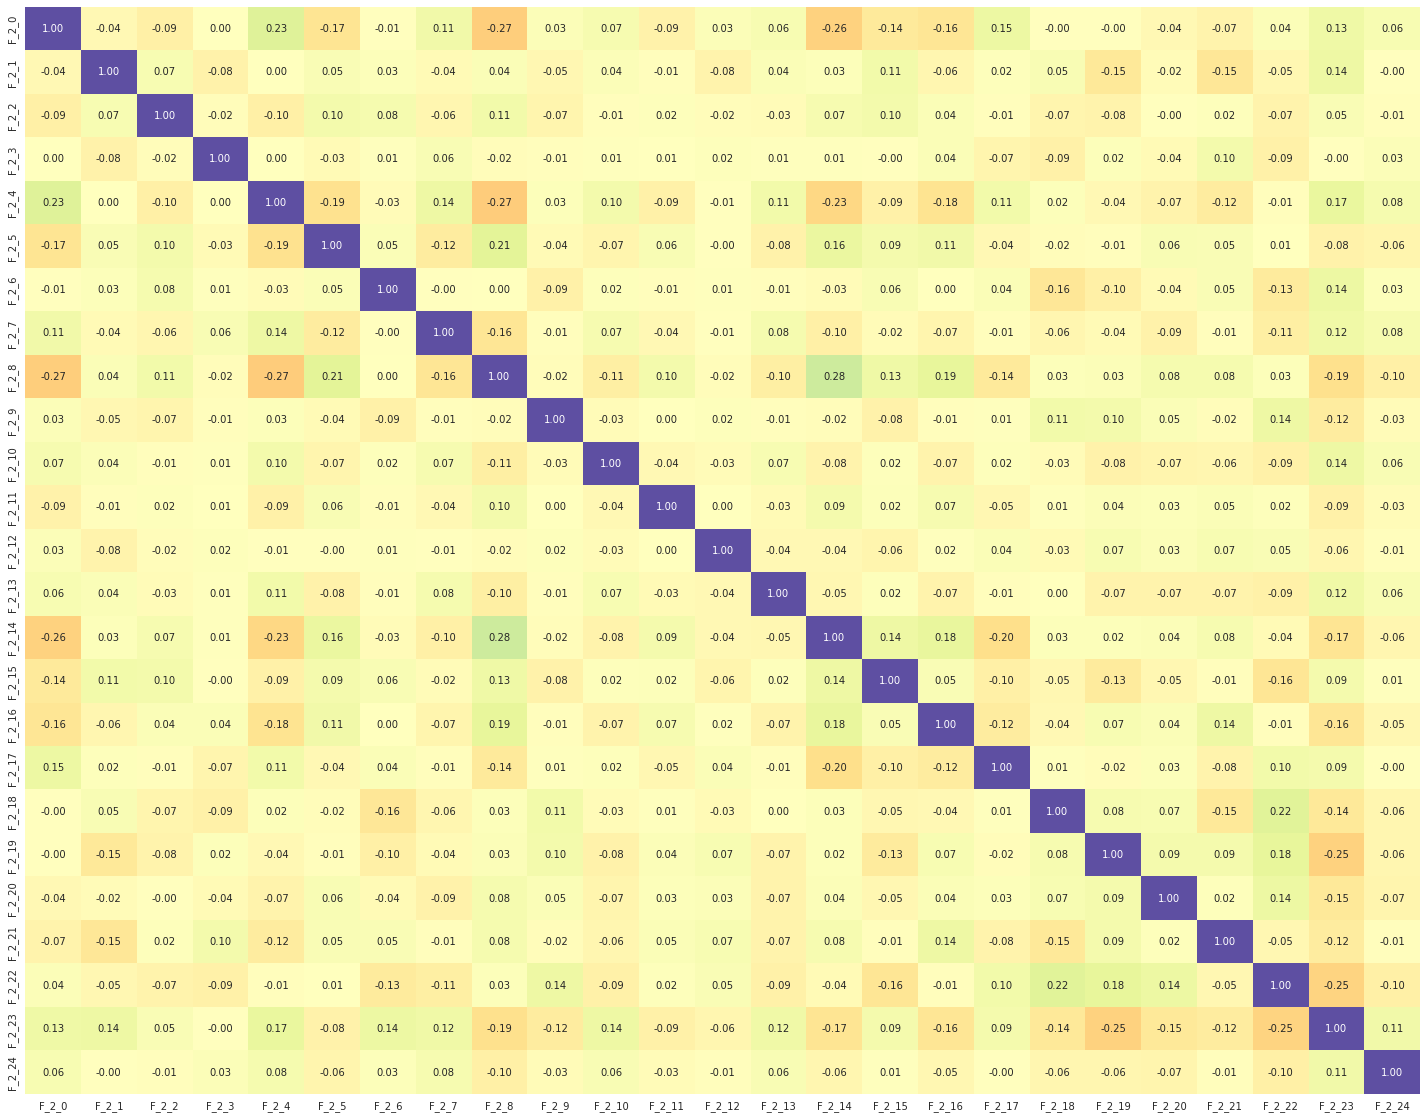

In [10]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[int_cols].corr(), annot= True, cmap="Spectral", fmt = '0.2f', vmin=-1, vmax=1, cbar=False);

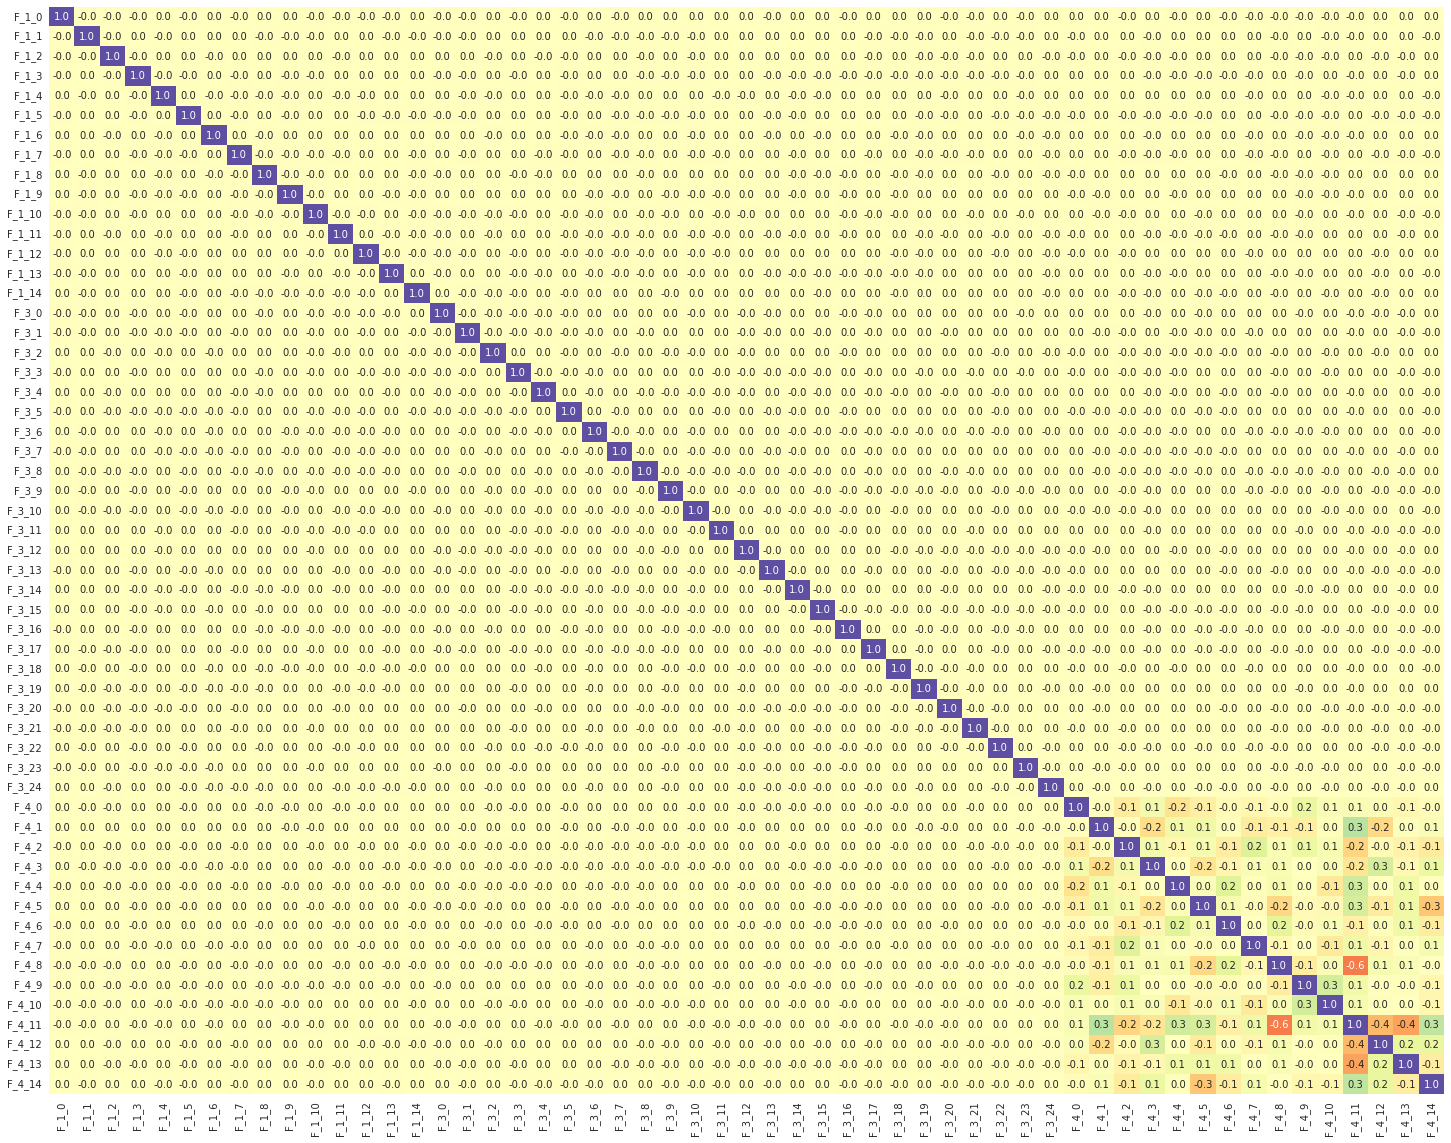

In [11]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[float_cols].corr(), annot= True, cmap="Spectral", fmt = '0.1f', vmin=-1, vmax=1, cbar=False);

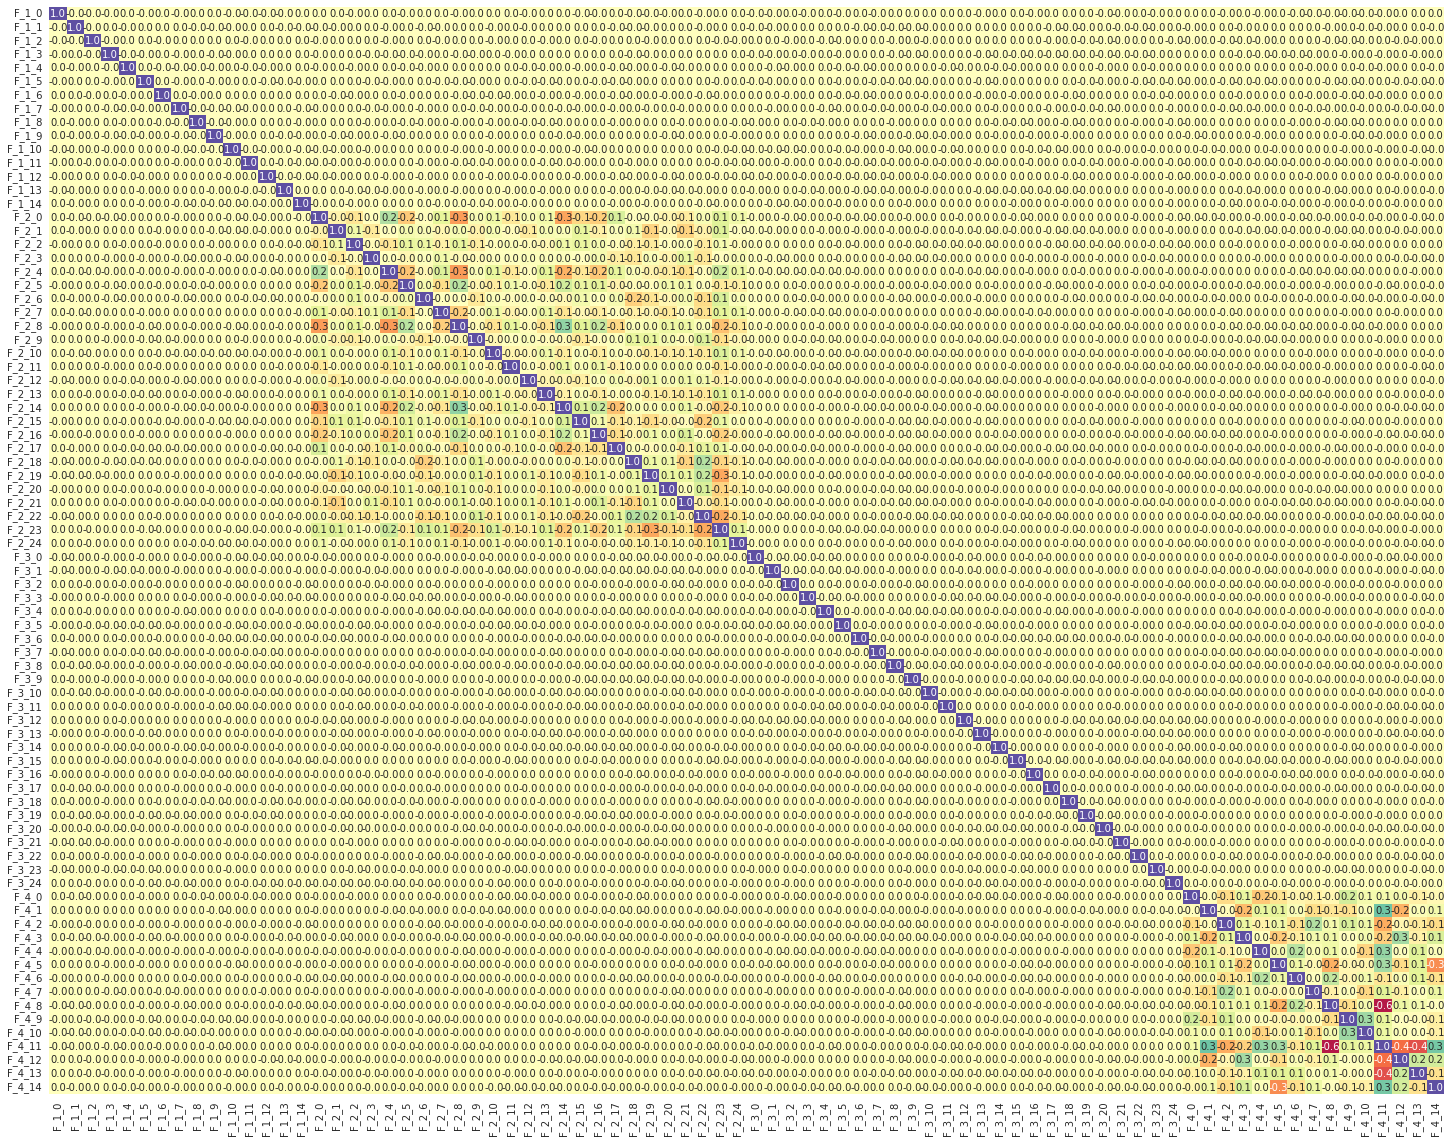

In [12]:
plt.subplots(figsize=(25,20))
sns.heatmap(df[feature_cols].corr(), annot= True, cmap="Spectral", fmt = '0.1f', vmin=-0.6, vmax=0.6, cbar=False);

## Observations:

* The F_4_X features are only correlated with other F_4_X features.
* The integer (discrete) F_2_X features are only correlated with other F_2_X features. (Note: theres no missing F_2_X features).
* F_1_X and F_3_X features are not correlated with any other feature.

## Insight:

* Consider using a regression model to predict F_1_1 values. There are no other columns correlated with this feature. This gives some indication that perhaps these other features are redundent for predictions. However its still possible that:
    * There no overall correlation with the target feature but the feature is still useful for predictions (high mutual information score)
    * Other features are useful for predictions when we consider feature interactions.

# Missing Data

In [13]:
missing_data_df = df.isna().sum().rename("missing_values").reset_index().rename(columns={"index":"column"})

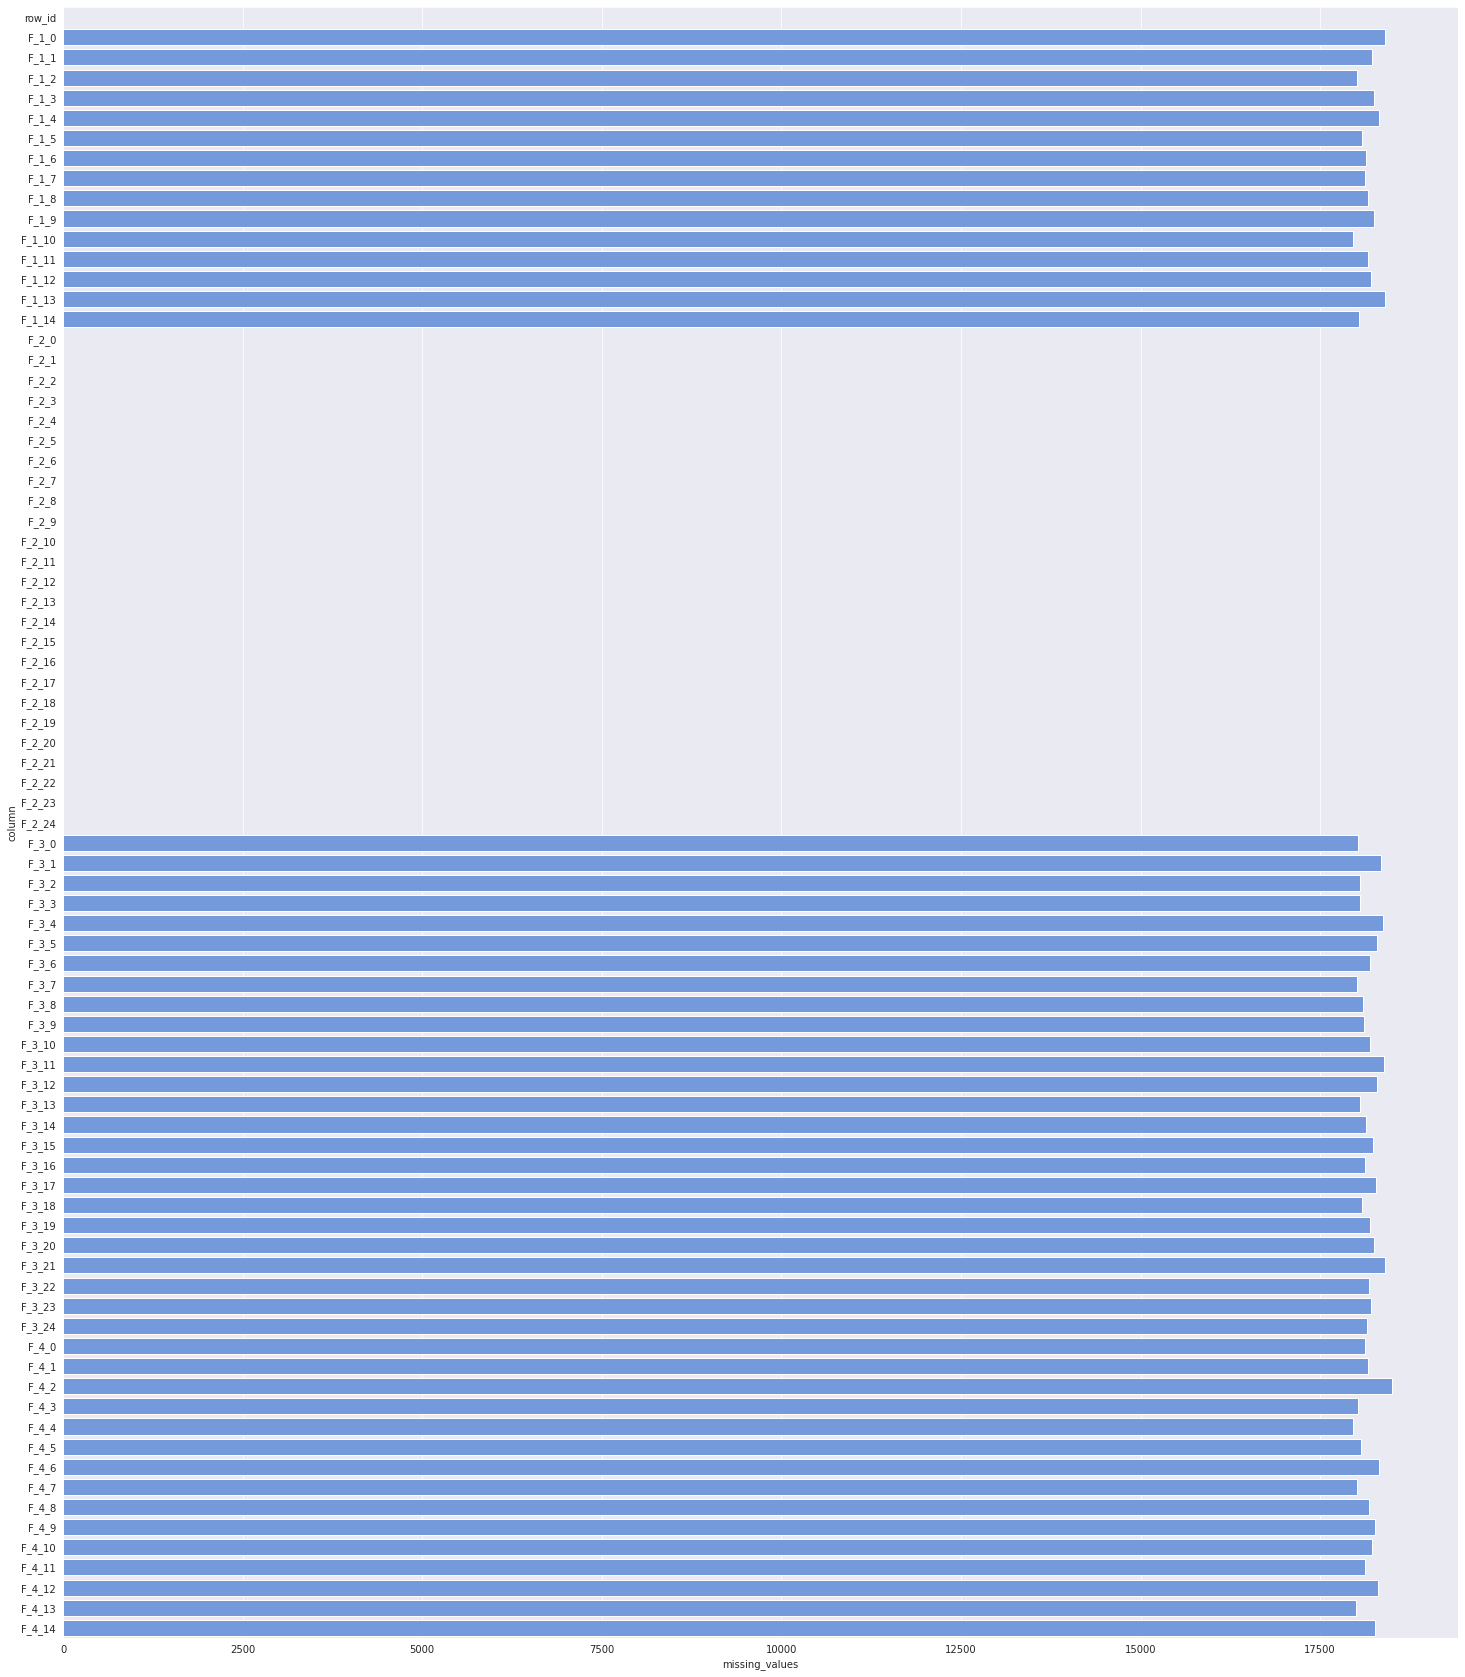

In [14]:
f,ax = plt.subplots(figsize=(25,30))
sns.barplot(data = missing_data_df, y="column", x="missing_values", color=random.choice(colors), orient="h");

## Number of missing values per row:

In [15]:
missing_data_df = df.isna().sum(axis=1).rename("missing_values").reset_index().rename(columns={"index":"row"})
val_count = missing_data_df["missing_values"].value_counts()
val_count

1    370798
0    364774
2    185543
3     61191
4     14488
5      2723
6       413
7        64
8         4
9         2
Name: missing_values, dtype: int64

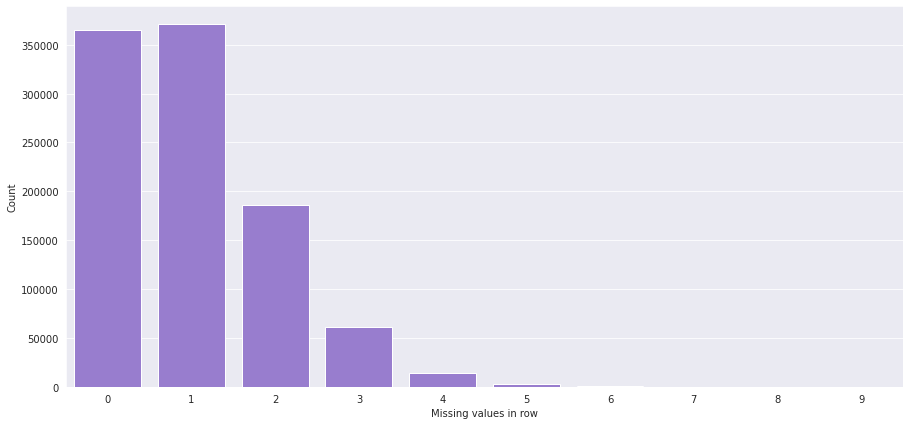

In [16]:
plt.subplots(figsize=(15,7))
ax = sns.barplot(x=val_count.index, y=val_count.values, color=random.choice(colors));
ax.set_xlabel("Missing values in row");
ax.set_ylabel("Count");

## Looking at nullity correlation: Does the missingness of one column affect the missingness of another:

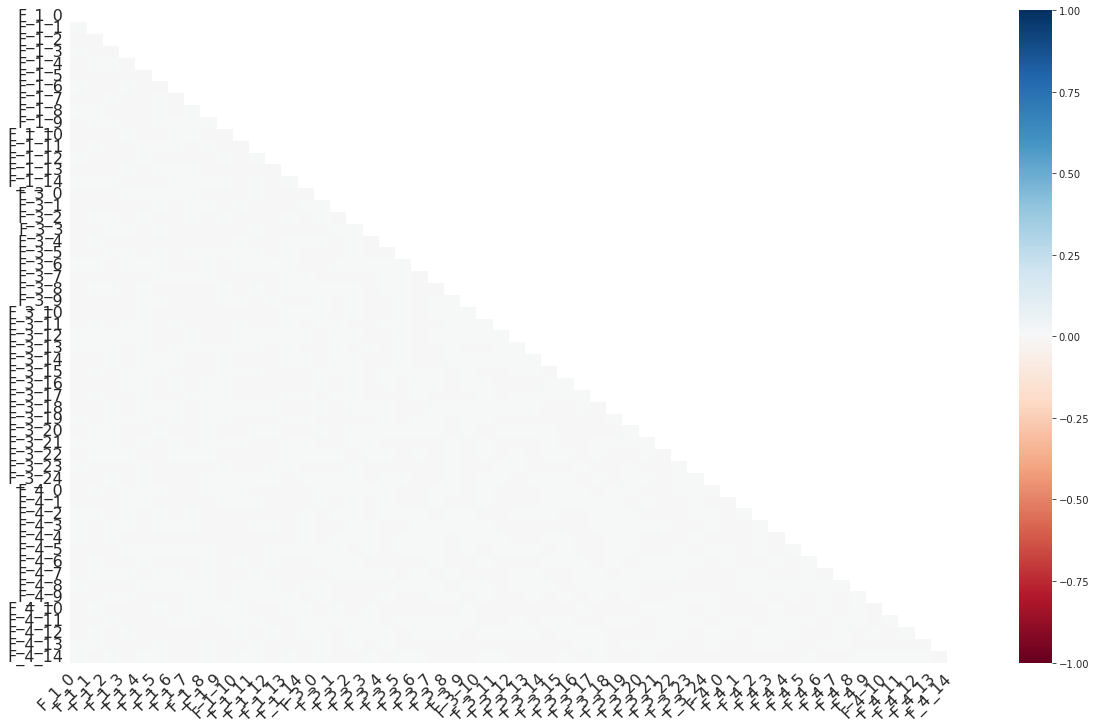

In [17]:
import missingno as msno
msno.heatmap(df);

# Observations:

## No nullity correlation, the missingness of features are independent from each other.

# K-Fold Cross-Validation

We take a single feature (here F_4_1) and train and evaluate how good the models predictions of this feature are. Once we have a good model we can use it to impute the missing values.

In [18]:
y_col = "F_4_1"
y = df[y_col].dropna()
X = df.loc[y.index].drop(columns=[y_col,"row_id"]).reset_index(drop=True)
y = y.reset_index(drop=True)

In [19]:
model = LGBMRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0, n_jobs=-1)

In [20]:
def k_fold_cv(model,X,y):
    kfold = KFold(n_splits = 5, shuffle=True, random_state = 0)

    feature_imp, y_pred_list, y_true_list, mse_list  = [],[],[],[]
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        print("==fold==", fold)
        X_train = X.loc[train_index]
        X_val = X.loc[val_index]

        y_train = y.loc[train_index]
        y_val = y.loc[val_index]

        model.fit(X_train,y_train)
        y_pred = model.predict(X_val)
            
        y_pred_list = np.append(y_pred_list, y_pred)
        y_true_list = np.append(y_true_list, y_val)

        mse_list.append(mean_squared_error(y_val,y_pred))
        print("MSE", mean_squared_error(y_val,y_pred))

        try:
            feature_imp.append(model.feature_importances_)
        except AttributeError: # if model does not have .feature_importances_ attribute
            pass # returns empty list
    return feature_imp, y_pred_list, y_true_list,mse_list, X_val, y_val

In [21]:
%%time
feature_imp, y_pred_list, y_true_list, mse_list, X_val, y_val = k_fold_cv(model=model,X=X,y=y)

==fold== 0
MSE 2.984439770014502
==fold== 1
MSE 2.992059384726048
==fold== 2
MSE 2.9827938129680134
==fold== 3
MSE 3.001451913450573
==fold== 4
MSE 2.982531190831214
CPU times: user 4min 13s, sys: 2.86 s, total: 4min 15s
Wall time: 1min 10s


In [22]:
print("Mean MSE:", np.mean(mse_list))

Mean MSE: 2.98865521439807


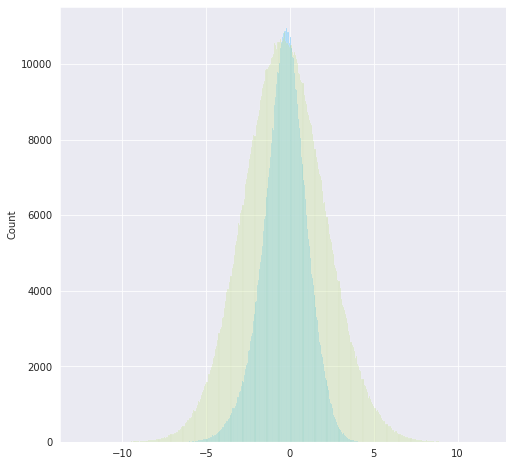

In [23]:
f,ax = plt.subplots(figsize=(8,8))
sns.histplot(y_pred_list, color=random.choice(colors))
sns.histplot(y_true_list, color=random.choice(colors), alpha=0.2);

In [24]:
def fold_feature_importances(model_importances, column_names, model_name, n_folds = 5, ax=None, boxplot=False):
    importances_df = pd.DataFrame({"feature_cols": column_names, "importances_fold_0": model_importances[0]})
    for i in range(1,n_folds):
        importances_df["importances_fold_"+str(i)] = model_importances[i]
    importances_df["importances_fold_median"] = importances_df.drop(columns=["feature_cols"]).median(axis=1)
    importances_df = importances_df.sort_values(by="importances_fold_median", ascending=False)
    if ax == None:
        f, ax = plt.subplots(figsize=(15, 25))
    if boxplot == False:
        ax = sns.barplot(data = importances_df, x = "importances_fold_median", y="feature_cols", color=random.choice(colors))
        ax.set_xlabel("Median Feature importance across all folds");
    elif boxplot == True:
        importances_df = importances_df.drop(columns="importances_fold_median")
        importances_df = importances_df.set_index("feature_cols").stack().reset_index().rename(columns={0:"feature_importance"})
        ax = sns.boxplot(data = importances_df, y = "feature_cols", x="feature_importance", color=random.choice(colors), orient="h")
        ax.set_xlabel("Feature importance across all folds");
    plt.title(model_name)
    ax.set_ylabel("Feature Columns")
    return ax

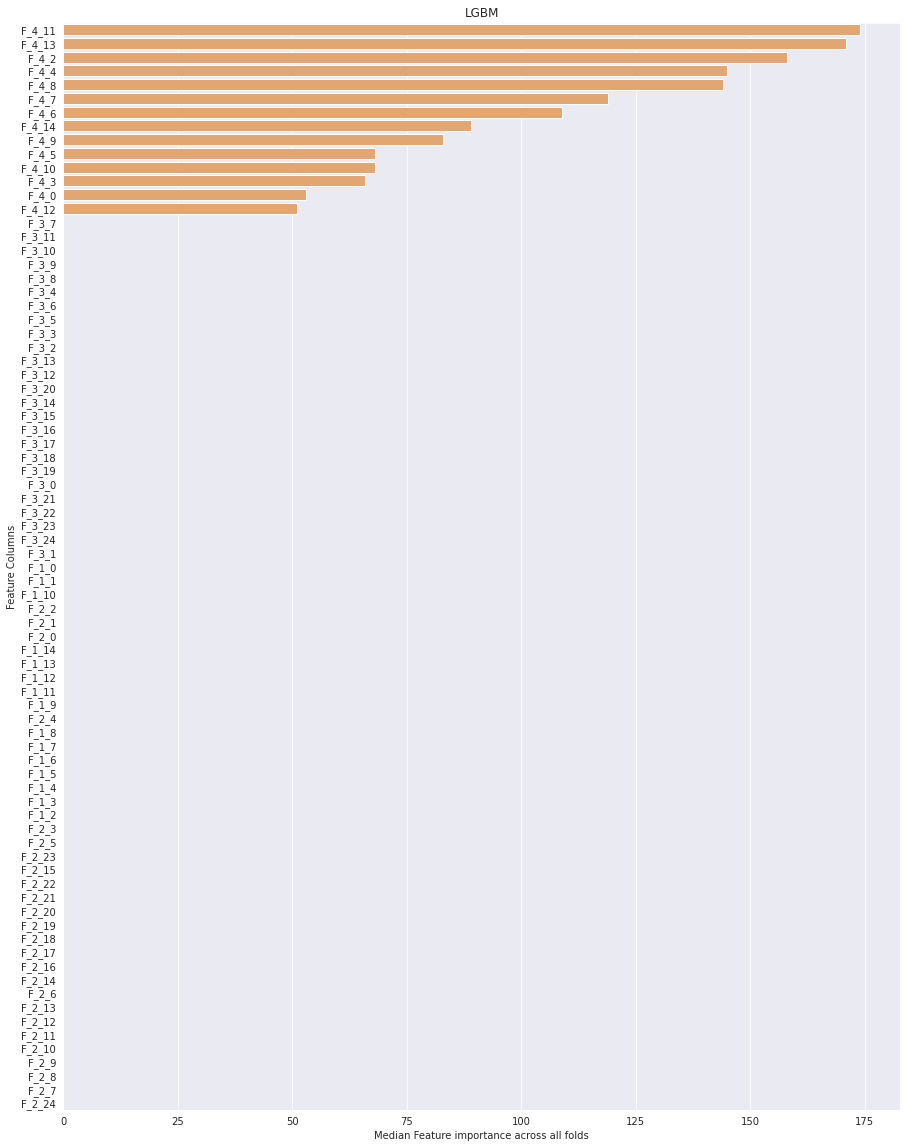

In [25]:
f, ax = plt.subplots(figsize=(15, 20))
fold_feature_importances(model_importances = feature_imp, column_names = X_val.columns, model_name = "LGBM", n_folds = 5, ax=ax, boxplot=False);

## Observations:

* Only the F_4 features are useful for predicting other f_4 columns.

# Comparing imputation methods

We now compare the prediction performance for each feature investigating whether its better to:

* Use the mean value to impute.
* Use the median value to impute.
* Use all 0 values to impute.
* Use a regression model to impute.

In [26]:
def compare_methods_fold(model,X,y):
    kfold = KFold(n_splits = 5, shuffle=True, random_state = 0)

    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        if fold < 1: # only evaluate 1/5 folds to save time
            X_train = X.loc[train_index]
            X_val = X.loc[val_index]

            y_train = y.loc[train_index]
            y_val = y.loc[val_index]

            model.fit(X_train,y_train)

            y_pred_model = model.predict(X_val)
            y_pred_mean = np.full(len(y_val), y_train.mean())
            y_pred_median = np.full(len(y_val), y_train.median())
            y_pred_zeros = np.zeros(len(y_val))
            
            mse_model =  mean_squared_error(y_val,y_pred_model)
            mse_mean =  mean_squared_error(y_val,y_pred_mean)
            mse_median =  mean_squared_error(y_val,y_pred_median)
            mse_zeros =  mean_squared_error(y_val,y_pred_zeros)

    return [mse_model, mse_mean, mse_median, mse_zeros]